# House price prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
house_data = pd.read_excel('housedata.xls','Sheet1')

In [3]:
house_data

,location,#bedrooms,#bathrooms,house area in 1000 square feet,"1 if condo, 0 otherwise",selling price in 1000 dollars
0,2,2,2,941,1,94905
1,2,3,2,1146,0,98937
2,2,3,2,909,0,100309
3,3,3,2,1289,0,106250
4,3,3,1,1020,0,107502
...,...,...,...,...,...,...
769,3,4,3,2280,0,232425;
770,3,3,2,1477,0,234000;
771,2,3,2,1216,0,235000;
772,3,4,2,1685,0,235301;


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   location                        774 non-null    int64 
 1   #bedrooms                       774 non-null    int64 
 2   #bathrooms                      774 non-null    int64 
 3   house area in 1000 square feet  774 non-null    int64 
 4   1 if condo, 0 otherwise         774 non-null    int64 
 5   selling price in 1000 dollars   774 non-null    object
dtypes: int64(5), object(1)
memory usage: 36.4+ KB


In [5]:
house_data['selling price in 1000 dollars'] = house_data['selling price in 1000 dollars'].astype(str).str.replace(';', '')

In [6]:
house_data['selling price in 1000 dollars'] = house_data['selling price in 1000 dollars'].astype('int64')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   location                        774 non-null    int64
 1   #bedrooms                       774 non-null    int64
 2   #bathrooms                      774 non-null    int64
 3   house area in 1000 square feet  774 non-null    int64
 4   1 if condo, 0 otherwise         774 non-null    int64
 5   selling price in 1000 dollars   774 non-null    int64
dtypes: int64(6)
memory usage: 36.4 KB


### 1. Use the columns x1 containing the area of each house and x2 containing the number of bedrooms in order to create a regression model of the form
       𝑦̂ = 𝛽1𝑥1 + 𝛽2𝑥2 + C

In [7]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(house_data[['house area in 1000 square feet','#bedrooms']], house_data['selling price in 1000 dollars'], train_size=695, test_size=len(house_data)-695, random_state=42)

In [8]:
X_train_1

,house area in 1000 square feet,#bedrooms
54,1420,3
726,1497,4
213,2491,4
265,3070,4
254,2607,4
...,...,...
71,1448,4
106,2354,4
270,2484,5
435,1596,2


In [9]:
model_reg = LinearRegression()
model_reg.fit(X_train_1, y_train_1)
print(f'Coefficients: {model_reg.coef_}')
print(f'Intercept: {model_reg.intercept_}')

Coefficients: [   147.62075453 -16517.72012914]
Intercept: 47590.403788706375


In [10]:
house_data['pred_price'] = model_reg.predict(house_data[['house area in 1000 square feet','#bedrooms']])
house_data

,location,#bedrooms,#bathrooms,house area in 1000 square feet,"1 if condo, 0 otherwise",selling price in 1000 dollars,pred_price
0,2,2,2,941,1,94905,153466.093539
1,2,3,2,1146,0,98937,167210.628088
2,2,3,2,909,0,100309,132224.509265
3,3,3,2,1289,0,106250,188320.395985
4,3,3,1,1020,0,107502,148610.413017
...,...,...,...,...,...,...,...
769,3,4,3,2280,0,232425,318094.843590
770,3,3,2,1477,0,234000,216073.097836
771,2,3,2,1216,0,235000,177544.080904
772,3,4,2,1685,0,235301,230260.494648


### 2. Create a scatter plot of actual and predicted sale price for all 774 houses.

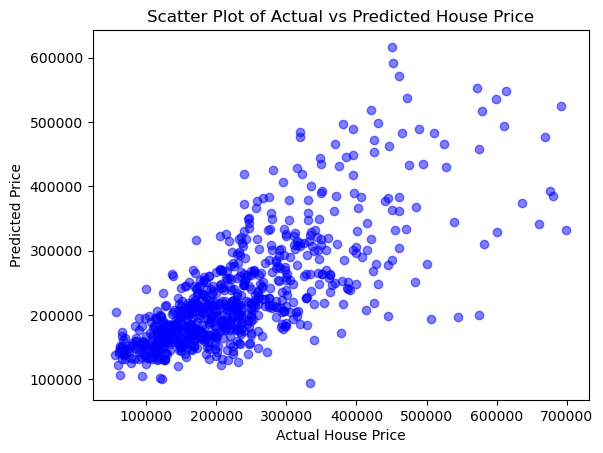

In [11]:
import matplotlib.pyplot as plt

plt.scatter(house_data['selling price in 1000 dollars'], house_data['pred_price'], c='blue', label='Scatter Plot',alpha=0.5)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted Price')
plt.title('Scatter Plot of Actual vs Predicted House Price')
plt.show()

### 3. Use the following 5 houses to test the efficiency of the above method

In [12]:
test_data = {
    'House': [1, 2, 3, 4, 5],
    'house area in 1000 square feet': [846, 1324, 1150, 3037, 3984],
    '#bedrooms': [1, 2, 3, 4, 5],
    'Actual_Price': [115000, 234500, 198000, 528000, 572500]
}
test_data = pd.DataFrame(test_data)
test_data

,House,house area in 1000 square feet,#bedrooms,Actual_Price
0,1,846,1,115000
1,2,1324,2,234500
2,3,1150,3,198000
3,4,3037,4,528000
4,5,3984,5,572500


In [13]:
test_data['pred_price'] = model_reg.predict(test_data[['house area in 1000 square feet','#bedrooms']])
test_data

,House,house area in 1000 square feet,#bedrooms,Actual_Price,pred_price
0,1,846,1,115000,155959.841988
1,2,1324,2,234500,210004.842522
2,3,1150,3,198000,167801.111106
3,4,3037,4,528000,429843.754766
4,5,3984,5,572500,553122.889173


### 4. Find the Root-Mean-Square Error (RMSE) for the training and test data. If they are close enough we have increased confidence that our model has reasonable generalization ability 

In [14]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test_data['Actual_Price'],test_data['pred_price'])
MSE

2639963037.680871

In [15]:
MSE_total = mean_squared_error(house_data['selling price in 1000 dollars'],house_data['pred_price'])
Root_MSE_total = np.sqrt(MSE_total)
Root_MSE_total

74867.29008996476

### 5. We develop a more complicated regression model for the house sales data.. For this more 
complex model we will use four base attributes or original features: 

• x1 is the area of the house (in 1000 square feet),

• x2 is the number of bedrooms,

• x3 is equal to one if the property is a condominium, and zero otherwise, 

• x4 is the five-digit ZIP code. 

In [16]:
def f1(c):
    return 1

In [17]:
def f2(x1):
    return x1

In [18]:
def f3(x1):
    return max(x1-1.5,0)

In [19]:
def f4(x2):
    return x2

In [20]:
def f5(x3):
    return x3

In [21]:
def f6(x4):
    if (x4 == 2):
        return 1
    else:
        return 0

In [22]:
def f7(x4):
    if (x4 == 3):
        return 1
    else:
        return 0

In [23]:
def f8(x4):
    if (x4 == 4):
        return 1
    else:
        return 0

In [24]:
house_data

,location,#bedrooms,#bathrooms,house area in 1000 square feet,"1 if condo, 0 otherwise",selling price in 1000 dollars,pred_price
0,2,2,2,941,1,94905,153466.093539
1,2,3,2,1146,0,98937,167210.628088
2,2,3,2,909,0,100309,132224.509265
3,3,3,2,1289,0,106250,188320.395985
4,3,3,1,1020,0,107502,148610.413017
...,...,...,...,...,...,...,...
769,3,4,3,2280,0,232425,318094.843590
770,3,3,2,1477,0,234000,216073.097836
771,2,3,2,1216,0,235000,177544.080904
772,3,4,2,1685,0,235301,230260.494648


In [25]:
house_data.columns

Index(['location ', '#bedrooms', '#bathrooms',
       'house area in 1000 square feet', '1 if condo, 0 otherwise ',
       'selling price in 1000 dollars', 'pred_price'],
      dtype='object')

In [26]:
house_data['f1(x)'] = house_data['location '].apply(f1)
house_data['f2(x)'] = house_data['house area in 1000 square feet'].apply(f2)
house_data['f3(x)'] = house_data['house area in 1000 square feet'].apply(f3)
house_data['f4(x)'] = house_data['#bedrooms'].apply(f4)
house_data['f5(x)'] = house_data['1 if condo, 0 otherwise '].apply(f5)
house_data['f6(x)'] = house_data['location '].apply(f6)
house_data['f7(x)'] = house_data['location '].apply(f7)
house_data['f8(x)'] = house_data['location '].apply(f8)
house_data

,location,#bedrooms,#bathrooms,house area in 1000 square feet,"1 if condo, 0 otherwise",selling price in 1000 dollars,pred_price,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x)
0,2,2,2,941,1,94905,153466.093539,1,941,939.5,2,1,1,0,0
1,2,3,2,1146,0,98937,167210.628088,1,1146,1144.5,3,0,1,0,0
2,2,3,2,909,0,100309,132224.509265,1,909,907.5,3,0,1,0,0
3,3,3,2,1289,0,106250,188320.395985,1,1289,1287.5,3,0,0,1,0
4,3,3,1,1020,0,107502,148610.413017,1,1020,1018.5,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,3,4,3,2280,0,232425,318094.843590,1,2280,2278.5,4,0,0,1,0
770,3,3,2,1477,0,234000,216073.097836,1,1477,1475.5,3,0,0,1,0
771,2,3,2,1216,0,235000,177544.080904,1,1216,1214.5,3,0,1,0,0
772,3,4,2,1685,0,235301,230260.494648,1,1685,1683.5,4,0,0,1,0


In [27]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(house_data[['f1(x)','f2(x)','f3(x)','f4(x)','f5(x)','f6(x)','f7(x)','f8(x)']], house_data['selling price in 1000 dollars'], train_size=695, test_size=len(house_data)-695, random_state=42)

In [28]:
X_train_2

,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x)
54,1,1420,1418.5,3,0,0,1,0
726,1,1497,1495.5,4,0,0,1,0
213,1,2491,2489.5,4,0,0,1,0
265,1,3070,3068.5,4,0,0,1,0
254,1,2607,2605.5,4,0,0,0,1
...,...,...,...,...,...,...,...,...
71,1,1448,1446.5,4,0,1,0,0
106,1,2354,2352.5,4,0,0,1,0
270,1,2484,2482.5,5,0,0,0,0
435,1,1596,1594.5,2,0,0,0,1


### 6. Find the new model resulting by the new base. Do question 2.

In [29]:
model_reg_new = LinearRegression()
model_reg_new.fit(X_train_2, y_train_2)
print(f'Coefficients: {model_reg_new.coef_}')
print(f'Intercept: {model_reg_new.intercept_}')

Coefficients: [ 0.00000000e+00  6.97693698e+01  6.97693698e+01 -1.20965014e+04
 -1.88420674e+04 -9.56471562e+04 -1.04177740e+05 -1.57290277e+04]
Intercept: 135838.08327624918


In [30]:
house_data['pred_price_new'] = model_reg_new.predict(house_data[['f1(x)','f2(x)','f3(x)','f4(x)','f5(x)','f6(x)','f7(x)','f8(x)']])
house_data

,location,#bedrooms,#bathrooms,house area in 1000 square feet,"1 if condo, 0 otherwise",selling price in 1000 dollars,pred_price,f1(x),f2(x),f3(x),f4(x),f5(x),f6(x),f7(x),f8(x),pred_price_new
0,2,2,2,941,1,94905,153466.093539,1,941,939.5,2,1,1,0,0,128357.156828
1,2,3,2,1146,0,98937,167210.628088,1,1146,1144.5,3,0,1,0,0,163708.164512
2,2,3,2,909,0,100309,132224.509265,1,909,907.5,3,0,1,0,0,130637.483219
3,3,3,2,1289,0,106250,188320.395985,1,1289,1287.5,3,0,0,1,0,175131.620525
4,3,3,1,1020,0,107502,148610.413017,1,1020,1018.5,3,0,0,1,0,137595.699564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,3,4,3,2280,0,232425,318094.843590,1,2280,2278.5,4,0,0,1,0,301318.010113
770,3,3,2,1477,0,234000,216073.097836,1,1477,1475.5,3,0,0,1,0,201364.903576
771,2,3,2,1216,0,235000,177544.080904,1,1216,1214.5,3,0,1,0,0,173475.876286
772,3,4,2,1685,0,235301,230260.494648,1,1685,1683.5,4,0,0,1,0,218292.460032


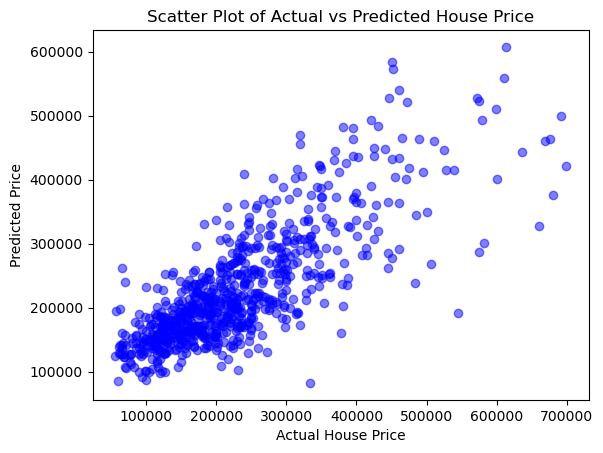

In [31]:
plt.scatter(house_data['selling price in 1000 dollars'], house_data['pred_price_new'], c='blue', label='Scatter Plot',alpha=0.5)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted Price')
plt.title('Scatter Plot of Actual vs Predicted House Price')
plt.show()

### 7. Use the cross validation technique for the above 2 models to testify the confidence in the generalization of the model.

In [32]:
from sklearn.model_selection import cross_val_score, KFold


def cross_val(X,y,model):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = -cross_val_results
    mean_mse = rmse_scores.mean()
    rmse = np.sqrt(mean_mse)
    print(f'RMSE: {rmse}')

#### Initial model RMSE

In [33]:
cross_val(X_train_1,y_train_1,model_reg)

RMSE: 75273.66812873415


#### New model RMSE

In [34]:
cross_val(X_train_2,y_train_2,model_reg_new)

RMSE: 69432.85198334427
